In [24]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.decomposition import PCA
!pip install pygam
from pygam import LinearGAM, s, f

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

In [2]:
train_data = pd.read_csv("train.csv", index_col=0)
test_data = pd.read_csv("test.csv", index_col=0)

In [ ]:
train_data.head()

,self_eval,teacher_eval,extracurricular,district,SRP_1,SRP_2,SRP_3,SRP_4,SRP_5,SRP_6,...,SRP_42,SRP_43,SRP_44,SRP_45,SRP_46,SRP_47,SRP_48,SRP_49,SRP_50,y
SEQN,,,,,,,,,,,,,,,,,,,,,
969167,4,5,9,3,-0.181,-0.379,-0.164,0.080,0.378,1.581,...,-1.156,-0.730,-0.508,-0.497,0.224,0.412,-0.517,0.099,0.114,-1.315
188942,4,3,5,4,-0.126,1.603,1.021,0.489,-1.404,-0.955,...,-0.318,1.240,-1.993,2.021,-1.078,-0.277,0.802,0.253,-0.720,1.997
134058,1,2,8,5,0.724,-0.702,2.249,0.910,0.330,0.411,...,0.449,1.980,-0.401,-0.544,-0.944,1.592,0.875,-0.734,-2.336,3.709
124022,3,3,10,6,0.706,-0.302,1.023,-0.895,0.625,1.283,...,2.025,-2.289,-0.407,0.025,-0.515,0.408,1.380,-1.075,-2.451,1.155
685285,5,5,1,5,-0.350,-1.001,0.931,0.192,0.491,0.292,...,-0.118,-0.288,0.457,-0.566,0.822,-0.317,0.661,2.096,0.004,-1.960


In [ ]:
test_data.head()

,self_eval,teacher_eval,extracurricular,district,SRP_1,SRP_2,SRP_3,SRP_4,SRP_5,SRP_6,...,SRP_41,SRP_42,SRP_43,SRP_44,SRP_45,SRP_46,SRP_47,SRP_48,SRP_49,SRP_50
SEQN,,,,,,,,,,,,,,,,,,,,,
492834,1,1,5,3,-0.873,-0.337,-0.350,0.845,-0.437,0.735,...,0.025,0.154,-0.417,-1.672,2.029,1.802,-0.302,0.051,-0.350,1.438
309349,3,2,9,6,-0.948,1.002,-0.936,-0.100,1.134,-0.065,...,0.079,0.189,1.065,-0.679,-2.169,1.265,0.828,0.078,-0.540,-1.024
468308,1,1,1,1,-0.356,0.283,0.708,0.740,-1.205,0.509,...,1.890,0.196,0.345,0.116,0.219,0.555,-0.829,0.019,0.906,2.146
838812,2,2,2,1,-0.135,-2.024,0.922,1.138,0.167,1.838,...,-0.035,0.496,-0.662,1.664,0.037,-1.263,0.043,-0.021,0.451,0.617
947936,4,4,8,6,-0.955,0.906,0.494,-0.020,-0.515,-0.242,...,0.698,0.004,0.044,-0.977,1.434,-0.747,0.453,0.573,-1.039,-0.782


In [14]:
#Based on https://www.geeksforgeeks.org/random-forest-regression-in-python/
rfr = RandomForestRegressor(n_estimators=1000, max_features = 54, random_state=0, oob_score=True)

train_data_Y = train_data.loc[:, 'y']
train_data_X = train_data
train_data_X = train_data_X.drop(['y'], axis=1)
test_data_X = test_data

ave_oob = np.array([])
ave_mse = np.array([])
ave_r2 = np.array([])

cv_data = cross_validate(rfr, train_data_X, train_data_Y, cv=5, scoring=['r2', 'neg_mean_absolute_error'], return_train_score=True)
print(cv_data)

print(np.mean(cv_data["test_r2"]))


#importances = rfr.feature_importances_
#forest_importances = pd.Series(importances, index= rfr.feature_names_in_)

#plt.figure(figsize=(10,12))
#forest_importances.sort_values(ascending = True).plot.barh()
#plt.title("Random Forest Regressor")
#plt.ylabel("Mean decrease in impurity")
#plt.show()

print("------------------------------------------------------------")
print(f'Ave Mean Squared Error: {np.mean(ave_mse)}')
print(f'Ave R-squared: {np.mean(ave_r2)}')
print(f'Ave Out-of-Bag Score: {np.mean(ave_oob)}')
# Access the OOB Score
#oob_score = rfr.oob_score_
#print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
#predictions = rfr.predict(train_data_X)

# Evaluating the model
#mse = mean_squared_error(train_data_Y, predictions)
#print(f'Full train set Mean Squared Error: {mse}')

#r2 = r2_score(train_data_Y, predictions)
#print(f'Ave R-squared: {np.mean(ave_r2)}')

#predictions_test = pd.DataFrame([])
#predictions_test["SEQN"] = test_data_X.index
#predictions_test["y"] = rfr.predict(test_data_X)
#predictions_test.to_csv("test_predictions.csv", index=False)

#print(f"RF training error: {train_error_rf}")
#print(f"RF test error: {test_error_rf}")

{'fit_time': array([305.14610815, 303.0299449 , 302.04343557, 305.07164454,
       305.83635855]), 'score_time': array([1.34908032, 0.57148051, 0.55984998, 0.65428257, 0.58279896]), 'test_r2': array([0.5808358 , 0.59079069, 0.5910602 , 0.56490012, 0.6064251 ]), 'train_r2': array([0.9444919 , 0.94362911, 0.94340366, 0.94353131, 0.94333127]), 'test_neg_mean_absolute_error': array([-0.78187145, -0.77718634, -0.79263333, -0.79203318, -0.77684641]), 'train_neg_mean_absolute_error': array([-0.2876649 , -0.28924825, -0.28920845, -0.29025852, -0.28860475])}
0.5868023832067297
------------------------------------------------------------
Ave Mean Squared Error: nan
Ave R-squared: nan
Ave Out-of-Bag Score: nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 = 0.52 with RFR alone.

In [28]:
hgbr = HistGradientBoostingRegressor(max_iter=250)

cv_data = cross_validate(hgbr, train_data_X, train_data_Y, cv=5, scoring=['r2', 'neg_mean_absolute_error'], return_train_score=True)

hgbr.fit(train_data_X.iloc[0:6400,:], train_data_Y.iloc[0:6400])
st_pred_test = hgbr.staged_predict(train_data_X.iloc[6400:8000,:])

#scores_train = []
#scores_test = []
#for iter in range(0,1000):
#  scores_test.append(r2_score(train_data_Y.iloc[6400:8000], next(st_pred_test)))

#plt.plot(scores_test, label='Test error')
#plt.title("Histogram Gradient Boosting Classifier")
#plt.ylabel("R2 Score")
#plt.xlabel("Number of trees, M")
#plt.show()

#print(f"Lowest test error: M = {np.argmin(scores_test) + 1}")
#print(f"Test error at M: {np.min(scores_test)}")

print(cv_data)
print(np.mean(cv_data["test_r2"]))

hgbr.fit(train_data_X, train_data_Y)
hgbr.predict(test_data_X)

predictions_test = pd.DataFrame([])
predictions_test["SEQN"] = test_data_X.index
predictions_test["y"] = hgbr.predict(test_data_X)

{'fit_time': array([10.39396143,  4.79783487,  5.11958599,  3.19723558,  3.26938343]), 'score_time': array([0.09699917, 0.04110169, 0.0369904 , 0.03860879, 0.03650641]), 'test_r2': array([0.76618162, 0.77464305, 0.77826191, 0.76696273, 0.77413003]), 'train_r2': array([0.985993  , 0.98529499, 0.98622481, 0.98539492, 0.98518155]), 'test_neg_mean_absolute_error': array([-0.5873794 , -0.56875435, -0.5850233 , -0.58456976, -0.58903087]), 'train_neg_mean_absolute_error': array([-0.14449082, -0.14720434, -0.1425743 , -0.14751886, -0.14745722])}
0.7720358707784399


In [29]:
predictions_test.to_csv("test_predictions_3.csv", index=False)

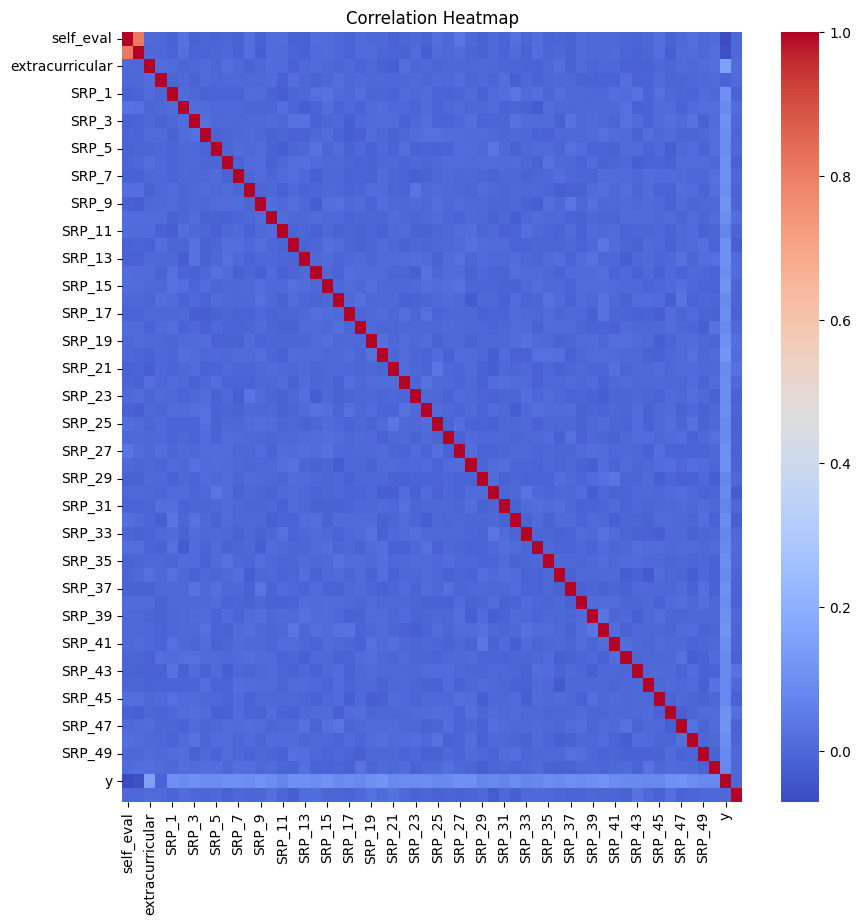

<Figure size 1000x1000 with 0 Axes>

In [ ]:
# Compute the correlation matrix
#corr_matrix = train_data.corr()
#new_mat = corr_matrix[corr_matrix > 0.1].fillna(0.0)

r = 0.0
for i in range(1, 50):
  r = r + (train_data['SRP_'+str(i)])**2
train_data["R"] = np.sqrt(r)

corr_matrix = train_data.corr()
#new_mat = corr_matrix[corr_matrix > 0.1].fillna(0.0)

# Generate a heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.figure(figsize=(10,10))
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

In [ ]:
gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5))
gam.fit(train_data_X, train_data_Y)

gam.summary()

lam = np.array([0.5, 1.0, 5.0, 10.0])
lams = [lam] * 6
print(lams)

gam.gridsearch(train_data_X, train_data_Y, lam=lams)

print("----------------------------------------------------------------------------")
print(f'Optimal lambda: {gam.lam}')
print("----------------------------------------------------------------------------")


gam.summary()

  0% (0 of 4096) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     52.4001
Link Function:                     IdentityLink Log Likelihood:                                -14252.5707
Number of Samples:                         8000 AIC:                                            28611.9417
                                                AICc:                                           28612.6729
                                                GCV:                                                1.8187
                                                Scale:                                              1.7972
                                                Pseudo R-Squared:                                   0.2434
Feature Function                  Lam

100% (4096 of 4096) |####################| Elapsed Time: 1:06:31 Time:  1:06:31


----------------------------------------------------------------------------
Optimal lambda: [[10.0], [10.0], [10.0], [1.0], [10.0], [10.0]]
----------------------------------------------------------------------------
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     43.4033
Link Function:                     IdentityLink Log Likelihood:                                -14253.5909
Number of Samples:                         8000 AIC:                                            28595.9886
                                                AICc:                                           28596.4954
                                                GCV:                                                1.8145
                                 

<ipython-input-36-72ff792d7be3>:17: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


Optimal lambda: [[10.0], [10.0], [10.0], [1.0], [10.0], [10.0]]


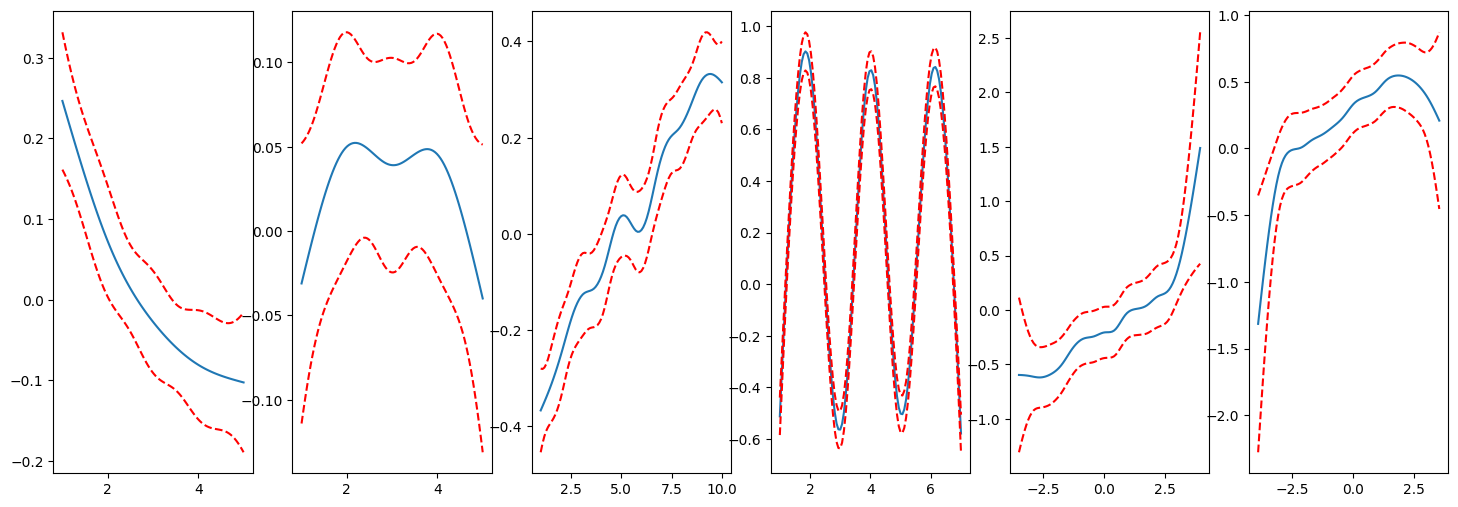

In [ ]:
#gam.gridsearch(X, y, lam=lams)

print(f'Optimal lambda: {gam.lam}')

# plotting
fig, axs = plt.subplots(1, 6, figsize=(18, 6))
#titles = ['Dis', 'Indus', 'Rad']
for i, ax in enumerate(axs):
    # create a nice grid of X data
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    #ax.set_ylim(-30,30)
    #ax.set_title(titles[i])


['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

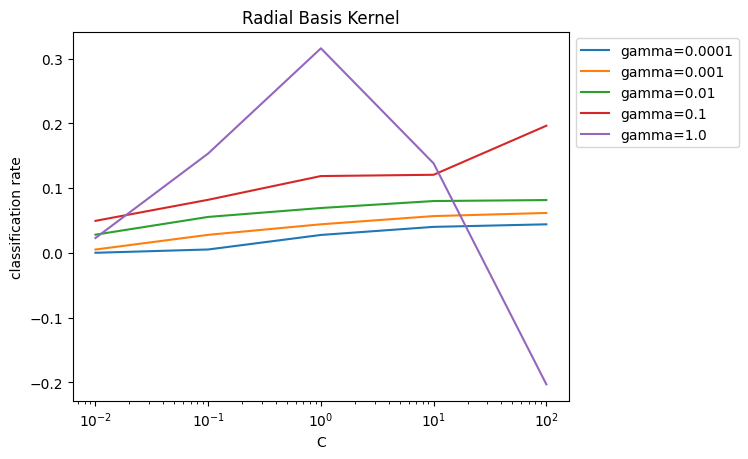

In [ ]:
# Defining the parameter space to do the search

train_data_Y = train_data.loc[:, 'y']
train_data_X = train_data
train_data_X = train_data_X.drop(['y'], axis=1)
param_grid = {'C': np.logspace(-2,2,
                               5),  # from .001 to 1000
             'gamma': np.logspace(-4,0, 5)}

svr = SVR(kernel='rbf')
print(sklearn.metrics.get_scorer_names())
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2')
grid_search.fit(train_data_X.loc[:,["self_eval", "district", "SRP_3", "SRP_15", "SRP_13", "SRP_16"]], train_data_Y)

results=pd.DataFrame(grid_search.cv_results_)
results.head()

# choose a few values of gamma,
gamchoices=[param_grid['gamma'][0],
            param_grid['gamma'][1],
            param_grid['gamma'][2],
            param_grid['gamma'][3],
            param_grid['gamma'][4]]

for gam in gamchoices:
    subresults=results.loc[results['param_gamma']==gam]
    plt.plot(subresults.param_C, subresults["mean_test_score"], label=f'gamma={gam}')

plt.title("Radial Basis Kernel")
plt.xlabel("C")
plt.ylabel("classification rate")
plt.legend(bbox_to_anchor=[1,1])
plt.gca().set_xscale('log')

In [ ]:
print(subresults)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
4        2.045955      0.467750         0.488509        0.008345    0.01   
9        2.045852      0.467811         0.487693        0.009911     0.1   
14       2.694102      0.523158         0.507609        0.048420     1.0   
19       7.345276      0.439282         0.591253        0.207120    10.0   
24      17.452527      0.669212         0.599289        0.212255   100.0   

   param_gamma                      params  split0_test_score  \
4          1.0   {'C': 0.01, 'gamma': 1.0}           0.024210   
9          1.0    {'C': 0.1, 'gamma': 1.0}           0.156986   
14         1.0    {'C': 1.0, 'gamma': 1.0}           0.317691   
19         1.0   {'C': 10.0, 'gamma': 1.0}           0.130816   
24         1.0  {'C': 100.0, 'gamma': 1.0}          -0.242476   

    split1_test_score  split2_test_score  split3_test_score  \
4            0.022760           0.022170           0.022064   
9            0.153734     

In [ ]:
#svr.fit(train_data_X, train_data_Y).predict(train_data_X)

# Making predictions on the same data or new data
svr_optimized = SVR(kernel="rbf", C=1, gamma=0.01)
predictions_svr = svr_optimized.fit(train_data_X.loc[:,["self_eval", "district", "SRP_3", "SRP_15", "SRP_13", "SRP_16"]], train_data_Y).predict(train_data_X.loc[:,["self_eval", "district", "SRP_3", "SRP_15", "SRP_13", "SRP_16"]])

# Evaluating the model
mse = mean_squared_error(train_data_Y, predictions_svr)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(train_data_Y, predictions_svr)
print(f'R-squared: {r2}')

predictions_test = pd.DataFrame([])
predictions_test["SEQN"] = test_data_X.index
predictions_test["y"] = svr_optimized.predict(test_data_X)

Mean Squared Error: 2.177527031251966
R-squared: 0.07726283952183755


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- SRP_1
- SRP_10
- SRP_11
- SRP_12
- SRP_14
- ...


In [ ]:
predictions_test.to_csv("test_predictions_2.csv", index=False)